In [44]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [56]:
imageSize=[224,224]
train_path = 'C:\\Users\\gattu pavan kumar\\Downloads\\dataset-20240219T080153Z-001\\dataset\\Training'
test_path = 'C:\\Users\\gattu pavan kumar\\Downloads\\dataset-20240219T080153Z-001\\dataset\Testing'

vgg = VGG16(input_shape=imageSize + [3], weights='imagenet', include_top=False)

In [46]:
for layer in vgg.layers:
  layer.trainable=False

In [47]:
folders = glob('C:\\Users\\gattu pavan kumar\\Downloads\\dataset-20240219T080153Z-001\\dataset\\Training\\*')

In [48]:
folders

['C:\\Users\\gattu pavan kumar\\Downloads\\dataset-20240219T080153Z-001\\dataset\\Training\\glioma_tumor',
 'C:\\Users\\gattu pavan kumar\\Downloads\\dataset-20240219T080153Z-001\\dataset\\Training\\meningioma_tumor',
 'C:\\Users\\gattu pavan kumar\\Downloads\\dataset-20240219T080153Z-001\\dataset\\Training\\no_tumor',
 'C:\\Users\\gattu pavan kumar\\Downloads\\dataset-20240219T080153Z-001\\dataset\\Training\\pituitary_tumor']

In [49]:
x= Flatten()(vgg.output)

In [50]:
prediction = Dense(len(folders),activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [51]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [52]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'], run_eagerly=True
)

In [53]:
train_datagen = ImageDataGenerator(rescale=1./225,
                                   shear_range = 0.2,
                                   zoom_range =0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./225)


In [54]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 2,
                                                 class_mode = 'categorical')


Found 2870 images belonging to 4 classes.


In [55]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=2,
                                            class_mode ='categorical')

Found 394 images belonging to 4 classes.


In [38]:
import sys
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch = len(training_set)//15,
    validation_steps = len(test_set)//15
)

C:\Users\gattu pavan kumar\AppData\Local\Temp\ipykernel_81140\500744701.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/15
95/95 [==============================] - 257s 3s/step - loss: 2.4003 - accuracy: 0.4158 - val_loss: 2.4387 - val_accuracy: 0.3462
Epoch 2/15
95/95 [==============================] - 262s 3s/step - loss: 1.4658 - accuracy: 0.5842 - val_loss: 2.2714 - val_accuracy: 0.5000
Epoch 3/15
95/95 [==============================] - 253s 3s/step - loss: 1.2816 - accuracy: 0.6474 - val_loss: 5.1133 - val_accuracy: 0.4615
Epoch 4/15
95/95 [==============================] - 258s 3s/step - loss: 1.3740 - accuracy: 0.6632 - val_loss: 4.5493 - val_accuracy: 0.3846
Epoch 5/15
95/95 [==============================] - 257s 3s/step - loss: 1.1629 - accuracy: 0.7105 - val_loss: 2.0774 - val_accuracy: 0.7308
Epoch 6/15
95/95 [==============================] - 264s 3s/step - loss: 0.9539 - accuracy: 0.7526 - val_loss: 2.6830 - val_accuracy: 0.6154
Epoch 7/15
95/95 [==============================] - 268s 3s/step - loss: 0.9281 - accuracy: 0.7316 - val_loss: 2.4941 - val_accuracy: 0.6154
Epoch 8/15
95

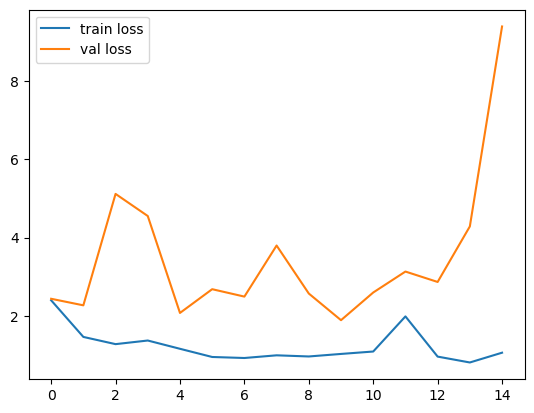

<Figure size 640x480 with 0 Axes>

In [39]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


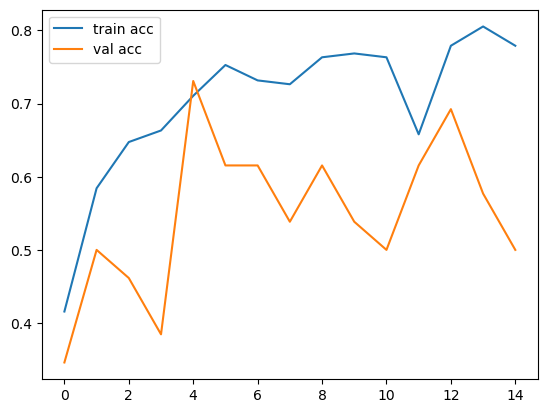

<Figure size 640x480 with 0 Axes>

In [40]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:
from tensorflow.keras.models import load_model

model.save('brain_vgg16.h5')